<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/adamczyk/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('countries of the world (2).csv')

In [130]:
dataset.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [131]:
dataset.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [132]:
numeric_columns = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']
categoric_columns = ['Country', 'Region']

In [133]:
from sklearn.preprocessing import MinMaxScaler
#dataset = dataset.dropna()
for col in numeric_columns:
  dataset[col] = dataset[col].replace(',','.', regex=True)
  dataset[col] = pd.to_numeric(dataset[col])
  dataset[col] = dataset[col].fillna(dataset[col].mean())
  scaler = MinMaxScaler()
  dataset[col] = scaler.fit_transform(dataset[col].values.reshape(-1, 1))

In [134]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    float64
 3   Area (sq. mi.)                      227 non-null    float64
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [135]:
for col in categoric_columns:
  dataset[col] = dataset[col].str.strip().str.lower()
  uniq = set((dataset[col]))
  print(len(uniq))
#dataset.drop(categoric_columns, inplace = True, axis = 1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Region'] = label_encoder.fit_transform(dataset['Region'])
numeric_columns.append('Region')

227
11


In [136]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset[numeric_columns])
cluster_labels = kmeans.labels_
dataset['cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [137]:
#kmeans.fit_transform(dataset[numeric_columns])

In [138]:
clustered_data = pd.concat([dataset['Country'], pd.Series(cluster_labels, name='cluster')], axis=1)
print(clustered_data)
clustered_data.to_excel('clustered_data.xlsx')

            Country  cluster
0       afghanistan        0
1           albania        2
2           algeria        2
3    american samoa        1
4           andorra        1
..              ...      ...
222       west bank        2
223  western sahara        2
224           yemen        2
225          zambia        1
226        zimbabwe        1

[227 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

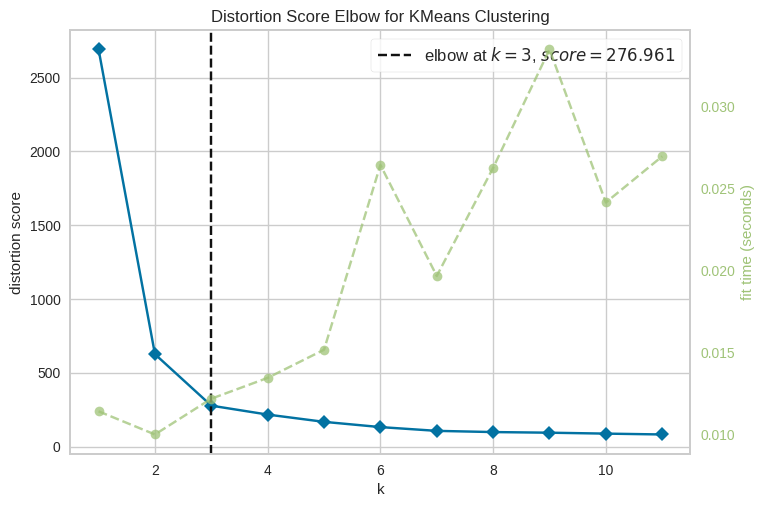

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [144]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(dataset[numeric_columns])
visualizer.show()

In [145]:
"""import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dataset[numeric_columns])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()
"""

"import matplotlib.pyplot as plt\n\nwcss = []\n\nfor i in range(1, 11):\n    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)\n    kmeans.fit(dataset[numeric_columns])\n    wcss.append(kmeans.inertia_)\n\nplt.figure(figsize=(10,6))\nplt.plot(range(1, 11), wcss, marker='o', linestyle='-')\nplt.title('Elbow Method')\nplt.xlabel('Number of clusters')\nplt.ylabel('WCSS')\nplt.xticks(np.arange(1, 11, 1))\nplt.grid(True)\nplt.show()\n"

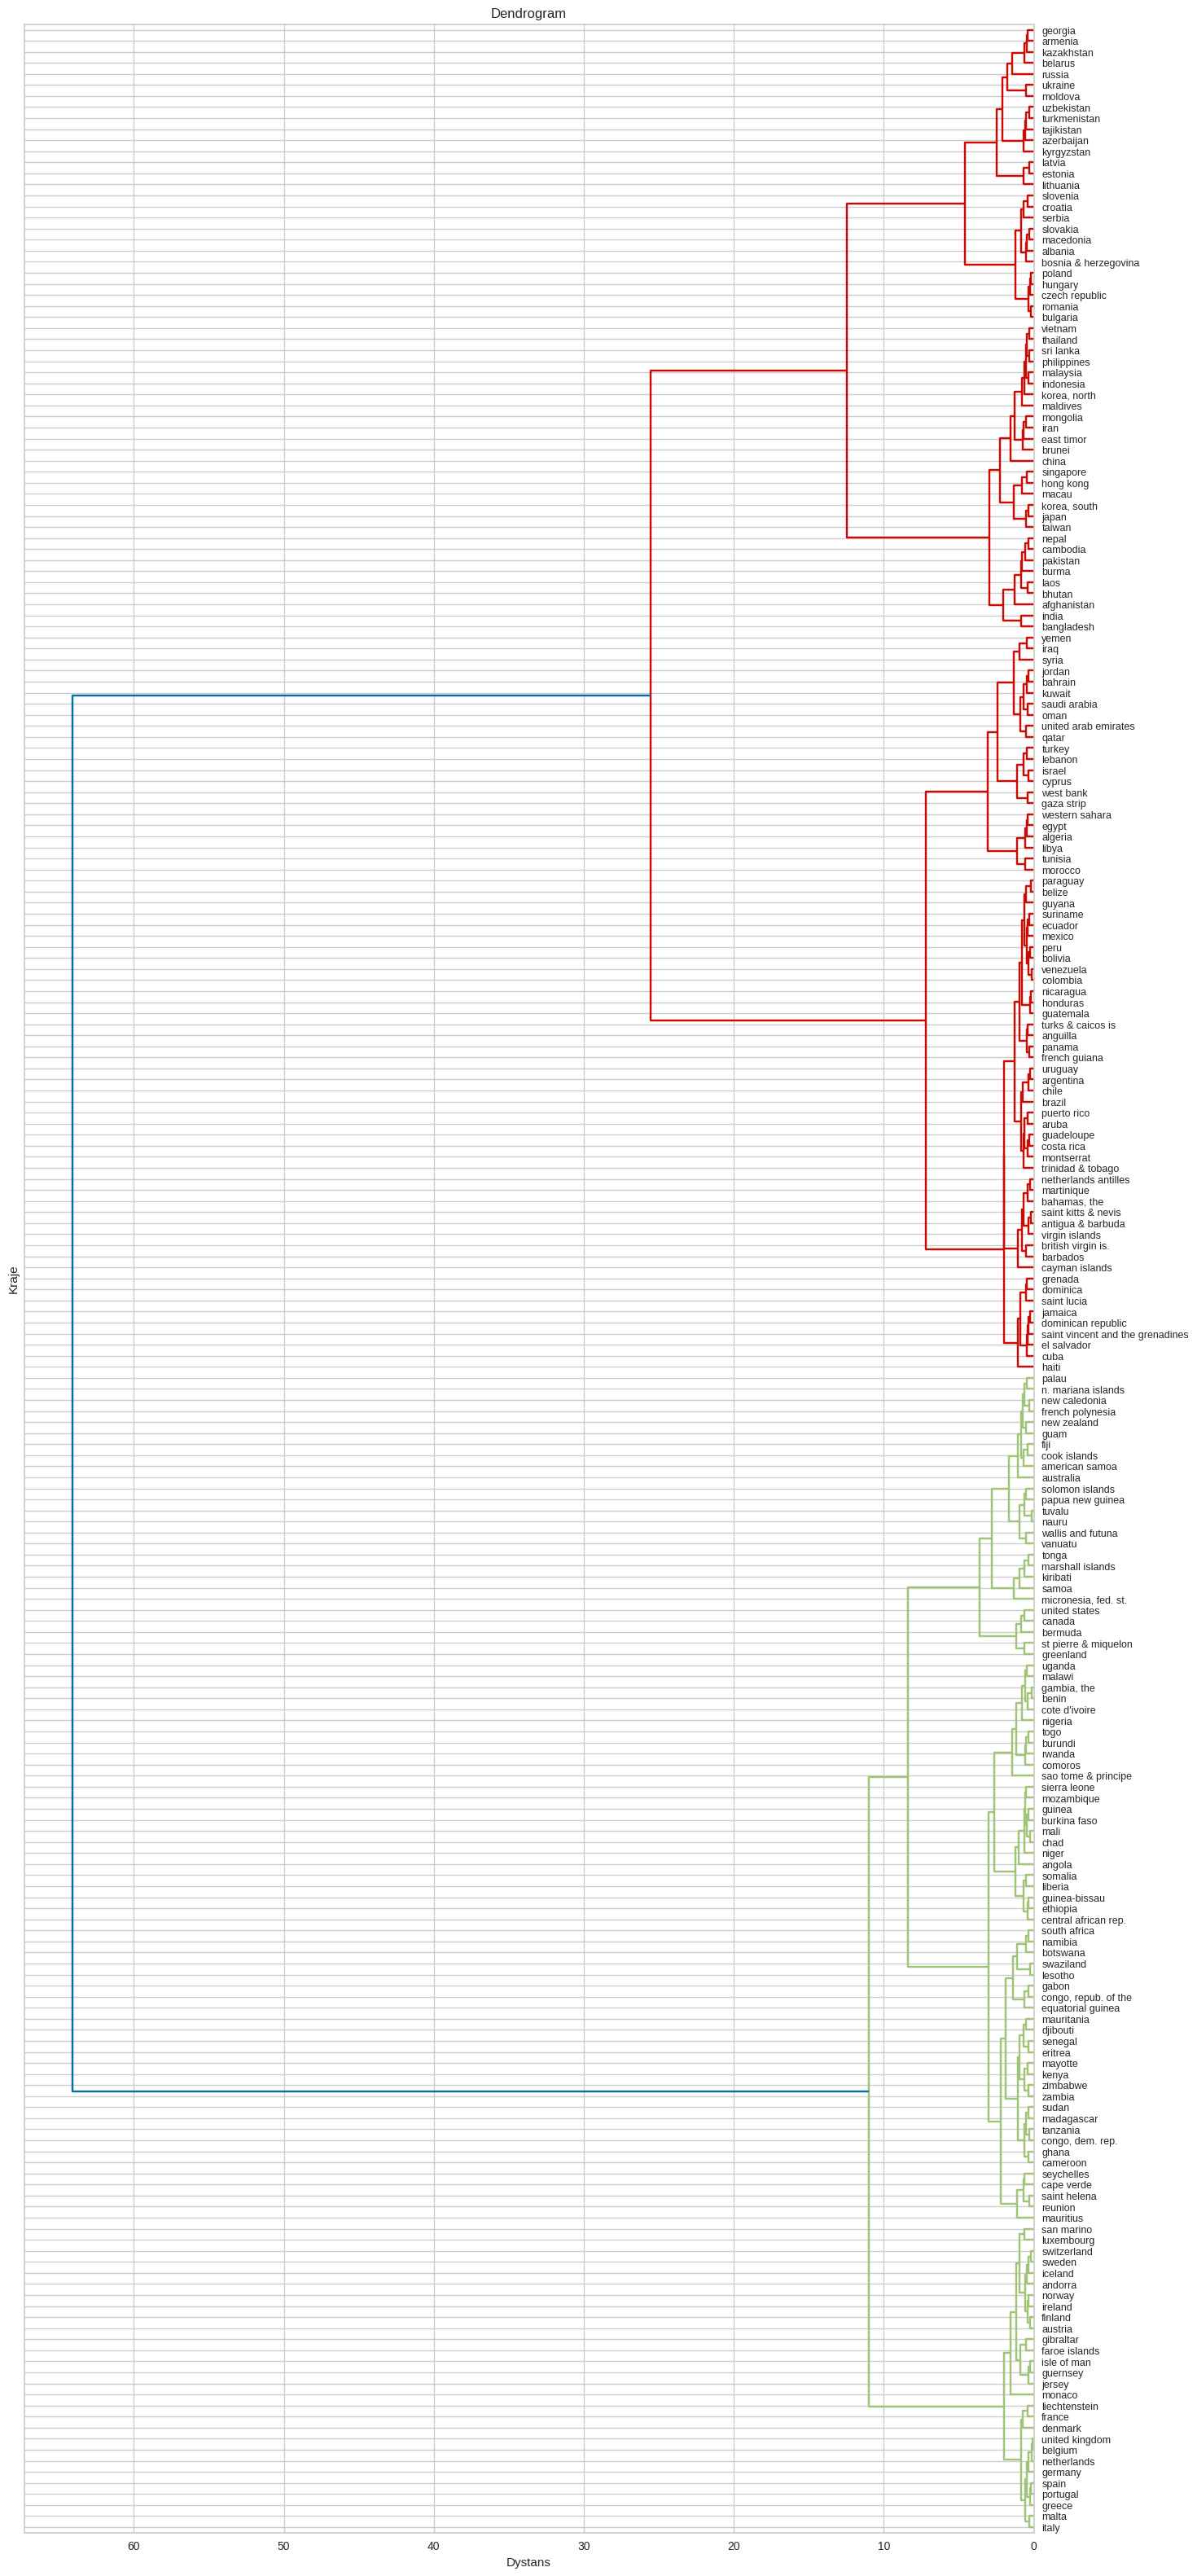

In [147]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

d = hierarchy.linkage(dataset[numeric_columns], method='ward')

plt.figure(figsize=(16, 40))
hierarchy.dendrogram(d, labels=dataset['Country'].values, leaf_rotation=0, leaf_font_size=9, orientation='left')  # Adjust rotation and font size
plt.title('Dendrogram')
plt.xlabel('Dystans')
plt.ylabel('Kraje')
plt.show()
